# import libs

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# load data and see shapes

In [30]:
mnist = keras.datasets.mnist

In [31]:
(train_features , train_labels) , (test_features , test_labels) = mnist.load_data()

In [ ]:
train_features.shape

(60000, 28, 28)

In [32]:
test_features.shape

(10000, 28, 28)

#see example

0


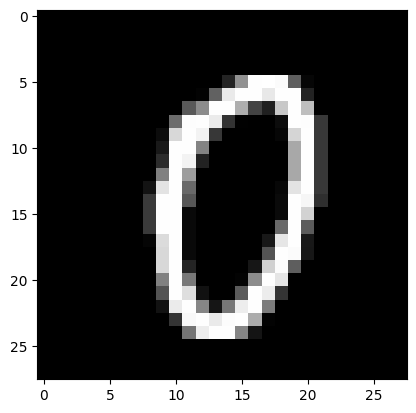

In [33]:
idx = 1000
img = train_features[idx]
print(train_labels[idx])
plt.gray()
plt.imshow(img)

# preprocessing (normalize)


In [34]:
train_features = train_features / 255.0
test_features = test_features / 255.0

# model definition


In [35]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128 , activation='relu' ))
model.add(keras.layers.Dense(units=64 , activation='relu' ))
model.add(keras.layers.Dense(units=10 , activation='softmax' ))
model.build(input_shape=(None , 28,28))

# compile model with adam optimizer & crossentropy

In [36]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


In [37]:
model.compile( optimizer='adam' , loss=tf.losses.categorical_crossentropy , metrics=['accuracy'])

In [38]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# train the model

In [39]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss' ,  patience=300 ,restore_best_weights=True )

In [41]:
hist = model.fit( train_features , train_labels , epochs=20 , batch_size= 34 , callbacks=[early_stop]  , validation_data=(test_features , test_labels))

Epoch 1/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9616 - loss: 0.1324 - val_accuracy: 0.9738 - val_loss: 0.0892
Epoch 2/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9759 - loss: 0.0792 - val_accuracy: 0.9731 - val_loss: 0.0891
Epoch 3/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0525 - val_accuracy: 0.9761 - val_loss: 0.0765
Epoch 4/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9741 - val_loss: 0.0800
Epoch 5/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0348 - val_accuracy: 0.9785 - val_loss: 0.0728
Epoch 6/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0271 - val_accuracy: 0.9793 - val_loss: 0.0720
Epoch 7/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9769 - val_loss: 0.0773
Epoch 8/20
1765/1765 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9938 - loss: 0.0188 

In [42]:
test_loss, test_acc = model.evaluate(test_features , test_labels)
print('loss : ' , test_loss)
print('accuracy : ' , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9758 - loss: 0.0824
loss :  0.0719514787197113
accuracy :  0.9793000221252441


# plot accuracy

Text(0.5, 0, 'epochs')

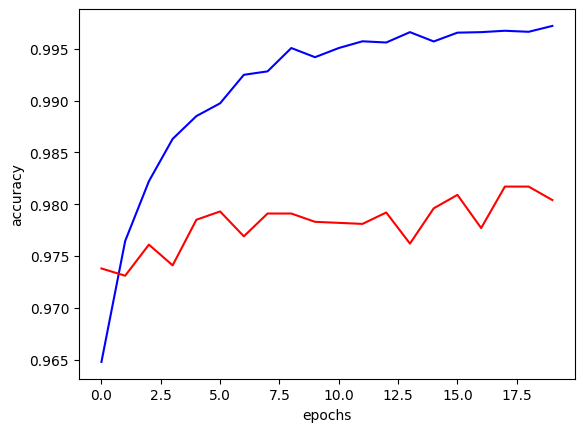

In [43]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc , color='blue')
plt.plot(val_acc , color = 'red')
plt.ylabel('accuracy')
plt.xlabel('epochs')

# plot loss

Text(0.5, 0, 'epochs')

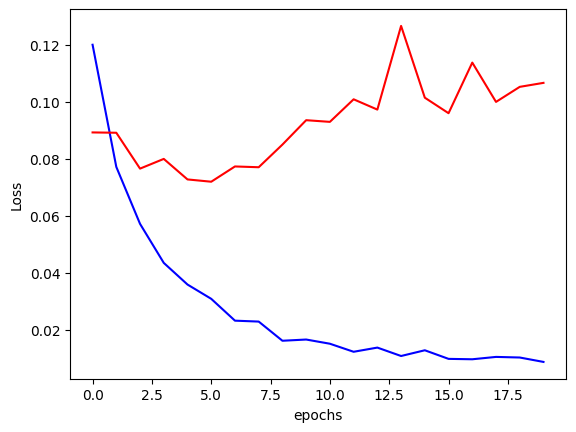

In [44]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(loss , color='blue')
plt.plot(val_loss , color = 'red')
plt.ylabel('Loss')
plt.xlabel('epochs')

# Predict sample

Mounted at /content/drive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


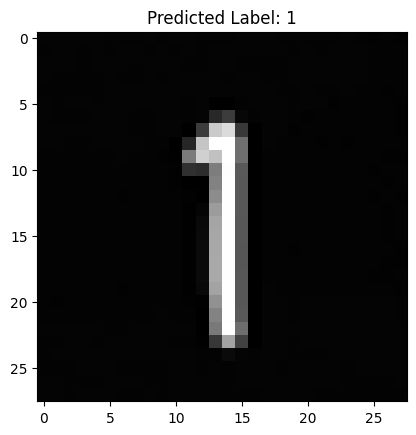

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


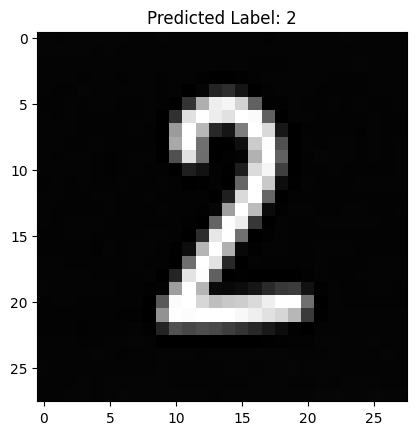

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


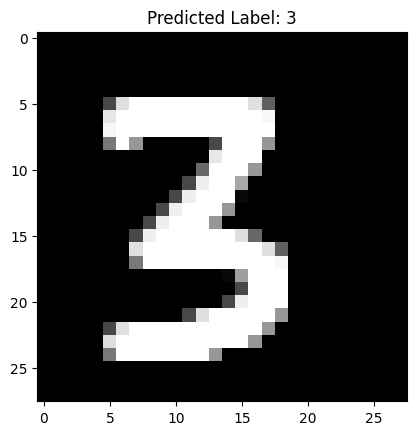

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


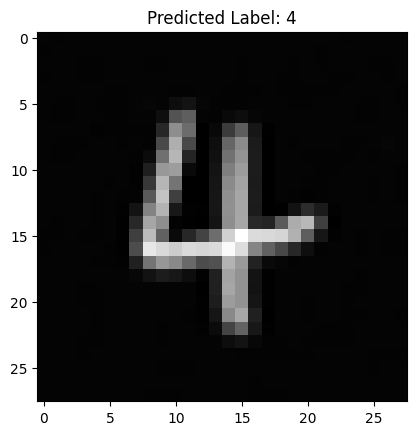

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


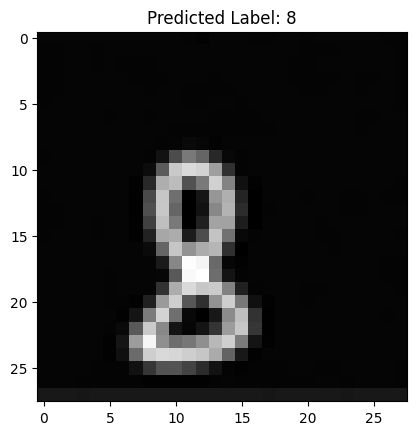

Loaded images into arrays!


In [45]:
from google.colab import drive
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


drive.mount('/content/drive', force_remount=True)
folder_path = '/content/drive/My Drive/Colab Notebooks/'

image_files = ['1.png', '2.png', '3.png', '4.png', '8.png']
image_arrays = []

# Load images
for image_file in range(len(image_files)):
    image_path = os.path.join(folder_path, image_files[image_file])

    if os.path.exists(image_path):
        # Open the image
        img = Image.open(image_path).convert('L')
        img = img.resize((28, 28))
        img_array = np.array(img)
        image_arrays.append(img_array)
    else:
        print(f"File not found: {image_path}")


for i in range(len(image_arrays)):

    img = image_arrays[i]
    img = img / 255.0  # Normalize
    test_data = np.reshape(img, (-1, 28, 28, 1)) #reshape
    predictions = model.predict(test_data)

    # Plot
    plt.gray()
    plt.imshow(image_arrays[i])
    plt.title(f'Predicted Label: {np.argmax(predictions)}')
    plt.show()


